<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_04/01_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

tokyo = 'https://gist.githubusercontent.com/gumdropsteve/40555dbb4cb01e694328879175e5feaf/raw/59a74ffbb4000a37f1bdb2f61dc7e702e07fa6e7/tokyo.csv'

df = pd.read_csv(tokyo)

df.tail()

,ds,search_filter,url,title,type,location,guests,bedrooms,beds,is_studio,baths,half_baths,shared_baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,heating_bool,waterfront_bool,dishwasher_bool,beachfront_bool,ski_in_ski_out_bool,terrace_bool,sonos_sound_system_bool,bbq_grill_bool,hair_dryer_bool
2835,2021-01-19 06:19:24.381501,shared_room_super_hosts,http://airbnb.com/rooms/41010866,2mins->Keisei Nippori Station/Mixed Capsule Room,Hotel beds,Arakawa City,NaN,1,NaN,False,NaN,NaN,NaN,14.0,5.00,3.0,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2836,2021-01-19 06:19:24.381501,shared_room_super_hosts,http://airbnb.com/rooms/39231922,【ROOM 402】 SKYTREE VIEW! 1LDK! MAX 4PPL FREE W...,Entire apartment,Koto City,2.0,1,2.0,False,1.0,NaN,NaN,21.0,4.26,19.0,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2837,2021-01-19 06:19:24.381501,shared_room_super_hosts,http://airbnb.com/rooms/33690815,Rumah Bagus Asakusa★15p /Whole rent＆WiFi sky tree,Private room,Sumida City,5.0,1,5.0,False,NaN,NaN,NaN,14.0,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2838,2021-01-19 06:19:24.381501,shared_room_super_hosts,http://airbnb.com/rooms/39589504,"Quiet residential Shinjuku area,8 min on foot Sta",Entire apartment,Shinjuku City,2.0,0,2.0,True,1.0,NaN,NaN,27.0,4.71,35.0,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2839,2021-01-19 06:19:24.381501,shared_room_super_hosts,http://airbnb.com/rooms/30092062,4 minutes to Shinjuku: New Tokyo Apartment 302,Entire apartment,Nakano-ku,NaN,0,NaN,True,1.0,NaN,NaN,32.0,4.86,69.0,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.ds.unique()

array(['2021-01-19 06:11:41.572636', '2021-01-19 06:11:44.745158',
       '2021-01-19 06:11:47.373109', '2021-01-19 06:11:50.534672',
       '2021-01-19 06:11:53.464805', '2021-01-19 06:11:55.938184',
       '2021-01-19 06:11:59.141610', '2021-01-19 06:12:01.869308',
       '2021-01-19 06:12:04.320779', '2021-01-19 06:12:07.427432',
       '2021-01-19 06:12:10.401469', '2021-01-19 06:12:14.205289',
       '2021-01-19 06:12:17.660042', '2021-01-19 06:12:20.824571',
       '2021-01-19 06:12:23.730791', '2021-01-19 06:12:25.954838',
       '2021-01-19 06:12:28.908972', '2021-01-19 06:12:30.937501',
       '2021-01-19 06:12:33.815798', '2021-01-19 06:12:36.782855',
       '2021-01-19 06:12:39.667137', '2021-01-19 06:12:42.470674',
       '2021-01-19 06:12:45.424726', '2021-01-19 06:12:48.354883',
       '2021-01-19 06:12:51.879966', '2021-01-19 06:12:54.596652',
       '2021-01-19 06:12:57.499502', '2021-01-19 06:13:00.079176',
       '2021-01-19 06:13:02.762435', '2021-01-19 06:13:06.0674

In [ ]:
df.ds.str.split(expand=True)[0]

0       2021-01-19
1       2021-01-19
2       2021-01-19
3       2021-01-19
4       2021-01-19
           ...    
2835    2021-01-19
2836    2021-01-19
2837    2021-01-19
2838    2021-01-19
2839    2021-01-19
Name: 0, Length: 2840, dtype: object

In [ ]:
df.ds.str.split(expand=True)[0].unique()

array(['2021-01-19'], dtype=object)

## Categorical Features

In [ ]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

pd.DataFrame(data)

,price,rooms,neighborhood
0,850000,4,Queen Anne
1,700000,3,Fremont
2,650000,3,Wallingford
3,600000,2,Fremont


https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html

In [ ]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)

vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [ ]:
len(vec.fit_transform(data))

4

In [ ]:
type(vec.fit_transform(data))

numpy.ndarray

In [ ]:
vec.fit_transform(data)[0]

array([     0,      1,      0, 850000,      4])

In [ ]:
pd.DataFrame(vec.fit_transform(data))

,0,1,2,3,4
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


In [ ]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [ ]:
pd.DataFrame(data)

,price,rooms,neighborhood
0,850000,4,Queen Anne
1,700000,3,Fremont
2,650000,3,Wallingford
3,600000,2,Fremont


In [ ]:
t = vec.fit_transform(data)
names = vec.get_feature_names()

pd.DataFrame(t, columns=names)

,neighborhood=Fremont,neighborhood=Queen Anne,neighborhood=Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


What if same price?

In [ ]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

pd.DataFrame(data)

,price,rooms,neighborhood
0,850000,4,Queen Anne
1,700000,3,Fremont
2,700000,3,Wallingford
3,650000,3,Wallingford
4,600000,2,Fremont


In [ ]:
t = vec.fit_transform(data)
names = vec.get_feature_names()

pd.DataFrame(t, columns=names)

,neighborhood=Fremont,neighborhood=Queen Anne,neighborhood=Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,700000,3
3,0,0,1,650000,3
4,1,0,0,600000,2


Now with actual data...

In [ ]:
df['type']

0       Entire apartment
1       Entire apartment
2       Entire apartment
3       Entire apartment
4       Entire apartment
              ...       
2835          Hotel beds
2836    Entire apartment
2837        Private room
2838    Entire apartment
2839    Entire apartment
Name: type, Length: 2840, dtype: object

In [ ]:
len(df['type'].unique())

15

In [ ]:
df['type'].value_counts()

Entire apartment             1667
Hotel room                    362
Private room                  322
Hostel room                    92
Entire house                   80
Hostel beds                    69
Shared room                    68
Entire condominium             48
Hotel beds                     38
Room                           35
Entire loft                    24
Entire serviced apartment      16
Beds                           16
Entire cabin                    2
Entire townhouse                1
Name: type, dtype: int64

In [ ]:
# overall, we want to predict price
df['price']

0       112.0
1        23.0
2        33.0
3        37.0
4        37.0
        ...  
2835     14.0
2836     21.0
2837     14.0
2838     27.0
2839     32.0
Name: price, Length: 2840, dtype: float64

In [ ]:
# df.to_dict()

In [ ]:
# from sklearn.feature_extraction import DictVectorizer

# vec = DictVectorizer(sparse=False, dtype=int)

# vec.fit_transform(df['type'])  # df['type'] is not a dict

In [ ]:
d = {'type':t for t in df['type']}
d

{'type': 'Entire apartment'}

In [ ]:
# need my data to look like this
data

[{'neighborhood': 'Queen Anne', 'price': 850000, 'rooms': 4},
 {'neighborhood': 'Fremont', 'price': 700000, 'rooms': 3},
 {'neighborhood': 'Wallingford', 'price': 700000, 'rooms': 3},
 {'neighborhood': 'Wallingford', 'price': 650000, 'rooms': 3},
 {'neighborhood': 'Fremont', 'price': 600000, 'rooms': 2}]

In [ ]:
d = [{'type':v} for v in df.type]
# d

In [ ]:
pd.DataFrame(d)

,type
0,Entire apartment
1,Entire apartment
2,Entire apartment
3,Entire apartment
4,Entire apartment
...,...
2835,Hotel beds
2836,Entire apartment
2837,Private room
2838,Entire apartment


In [ ]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)

# get list of dicts from `type` column
data = [{'type':v} for v in df.type]

vec.fit_transform(data)[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
vec.feature_names_

['type=Beds',
 'type=Entire apartment',
 'type=Entire cabin',
 'type=Entire condominium',
 'type=Entire house',
 'type=Entire loft',
 'type=Entire serviced apartment',
 'type=Entire townhouse',
 'type=Hostel beds',
 'type=Hostel room',
 'type=Hotel beds',
 'type=Hotel room',
 'type=Private room',
 'type=Room',
 'type=Shared room']

In [ ]:
vec.fit_transform(data)[-5:]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
l = [1,2,7,32,8,2]
pd.Series(l)

0     1
1     2
2     7
3    32
4     8
5     2
dtype: int64

In [ ]:
pd.DataFrame(df['type'])

,type
0,Entire apartment
1,Entire apartment
2,Entire apartment
3,Entire apartment
4,Entire apartment
...,...
2835,Hotel beds
2836,Entire apartment
2837,Private room
2838,Entire apartment


In [ ]:
len(df['type'].unique())

15

In [ ]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)

# get list of dicts from `type` column
data = [{'type':v} for v in df.type]

t = vec.fit_transform(data)
names = vec.feature_names_

pd.DataFrame(t, columns=names)

,type=Beds,type=Entire apartment,type=Entire cabin,type=Entire condominium,type=Entire house,type=Entire loft,type=Entire serviced apartment,type=Entire townhouse,type=Hostel beds,type=Hostel room,type=Hotel beds,type=Hotel room,type=Private room,type=Room,type=Shared room
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2836,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2837,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2838,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)

# get list of dicts from `type` column
data = [{'type':v} for v in df.location]

t = vec.fit_transform(data)
names = vec.feature_names_

pd.DataFrame(t, columns=names)

,type=Arakawa City,type=Arakawa-ku,type=Bunkyo City,type=Chigasaki-shi,type=Chiyoda City,type=Chiyoda-ku,type=Choshi,type=Chuo City,type=Chuo Ku,type=Chuo-ku,type=Chūō-ku,type=Edogawa City,type=Edogawa-ku,type=Fujisawa,type=Fujiyoshida-shi,type=Funabashi,type=Funabashi-shi,type=Hachioji,type=Hanno,type=Ichikawa,type=Inagi-shi,type=Isumi,type=Itabashi City,type=Itbashi-ku,type=Kai-shi,type=Kamagaya,type=Kamakura,type=Katsushika City,type=Katsushika-ku,type=Kawagoe,type=Kita City,"type=Kita Ward, Saitama",type=Koto City,type=Kōtō-ku,type=Matsudo-shi,"type=Midori-ku, Yokohama-shi","type=Midoriku, Saitamashi",type=Minato City,type=Minato-City,type=Minato-ku,...,type=Taito City,type=Taitō,type=Taitō-ku,type=Toshima,type=Toshima City,type=Toshima-ku,type=Yamanashi-shi,type=Yokohama,type=Yokosuka-shi,type=aparthotel,type=boutique hotel,type=shinjuku-ku,type=Ōta-ku,type=中野区,type=中野区弥生町,type=八王子市,type=北区滝野川,type=千代田区,type=千代田区内神田,type=千葉市中央区,type=台東区,type=台東区西浅草,type=墨田区,type=大田区,"type=小柳町, Fuchu",type=文京区,type=新宿区,type=杉並区,type=板橋区,type=桐生市,type=横浜市,type=江東区,type=渋谷区,type=港区,"type=目黒区, 東京都, JP",type=目黒区柿の木坂2-17-6,type=緑区,type=豊島区,type=赤坂見附,type=足柄下郡箱根町
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2837,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Note on pandas get_dummies...

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [ ]:
pd.get_dummies(df['type'])

,Beds,Entire apartment,Entire cabin,Entire condominium,Entire house,Entire loft,Entire serviced apartment,Entire townhouse,Hostel beds,Hostel room,Hotel beds,Hotel room,Private room,Room,Shared room
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2836,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2837,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2838,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies(df['type']).head(), df['type'].head()

(   Beds  Entire apartment  Entire cabin  ...  Private room  Room  Shared room
 0     0                 1             0  ...             0     0            0
 1     0                 1             0  ...             0     0            0
 2     0                 1             0  ...             0     0            0
 3     0                 1             0  ...             0     0            0
 4     0                 1             0  ...             0     0            0
 
 [5 rows x 15 columns], 0    Entire apartment
 1    Entire apartment
 2    Entire apartment
 3    Entire apartment
 4    Entire apartment
 Name: type, dtype: object)

In [ ]:
pd.get_dummies(df['type']).tail(), df['type'].tail()

(      Beds  Entire apartment  Entire cabin  ...  Private room  Room  Shared room
 2835     0                 0             0  ...             0     0            0
 2836     0                 1             0  ...             0     0            0
 2837     0                 0             0  ...             1     0            0
 2838     0                 1             0  ...             0     0            0
 2839     0                 1             0  ...             0     0            0
 
 [5 rows x 15 columns], 2835          Hotel beds
 2836    Entire apartment
 2837        Private room
 2838    Entire apartment
 2839    Entire apartment
 Name: type, dtype: object)

### Text Features

In [ ]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']
sample

['problem of evil', 'evil queen', 'horizon problem']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
# note, CountVectorizer returns sparce matrix by default
pd.DataFrame(X)

,0
0,"(0, 3)\t1\n (0, 2)\t1\n (0, 0)\t1"
1,"(0, 0)\t1\n (0, 4)\t1"
2,"(0, 3)\t1\n (0, 1)\t1"


In [ ]:
# so convert it to an array
X.toarray()

array([[1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0]])

In [ ]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [ ]:
sample = ['problem of evil',
          'problem of evil again again 2 2 22',
          'evil queen',
          'horizon problem']

vec = CountVectorizer()
X = vec.fit_transform(sample)

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,22,again,evil,horizon,of,problem,queen
0,0,0,1,0,1,1,0
1,1,2,1,0,1,1,0
2,0,0,1,0,0,0,1
3,0,0,0,1,0,1,0


Now with actual data...


In [ ]:
df.title

0       Twin beds with living room! 8min walk from GINZA!
1       6 min Sta. Very near Akihabara!!Good location/503
2                               大山駅から3分、高速無制限WiFi、池袋駅まで5分
3            New Double Room in Tokyo: Skytree View 702 B
4           Fashionable apartment close TOKYO SKYTREE 3-1
                              ...                        
2835     2mins->Keisei Nippori Station/Mixed Capsule Room
2836    【ROOM 402】 SKYTREE VIEW! 1LDK! MAX 4PPL FREE W...
2837    Rumah Bagus Asakusa★15p /Whole rent＆WiFi sky tree
2838    Quiet residential Shinjuku area,8 min on foot Sta
2839       4 minutes to Shinjuku: New Tokyo Apartment 302
Name: title, Length: 2840, dtype: object

In [ ]:
vec = CountVectorizer()
X = vec.fit_transform(df.title)

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,02,031,10,100inchプロジェクターシアタールームdvdnetflixamazonprime設置,100インチプロジェクター,101,101_bureau渋谷,102,103,103welcome,105,10min,10mins,10月一時休業,11,111,12,120インチプロジェクター,13min,13mins,15,15p,1bd,1br,1c,1db,1dk,1f,1h,1k,1ldk,1min,1mins,1p,1ppl,1room,1stop,1t,1名,20,...,送迎有,通信制限なし高速インターネット付,通信制限なし高速インターネット付で,都内へのアクセスよし,鎌倉,長期滞在に便利な施設です,長期滞在も歓迎です,長期滞在可能,閑静な住宅街,閑静の住宅街の中のゲストハウス,阿美橫町,除菌消毒徹底,雙人房101,雷門,静かな住宅街の中で,非接触型チェックイン,飲食店多数あり,駅から1分,駅から徒歩3分,駅から歩いて1分,駅から近い,駅まで徒歩で7分,駅徒歩３分,駅近立地,高速,高速wi,高速無制限wifi,龍馬池袋,１階,１２,６ベッド用意,ｂａｒ,ｃａｆé,ｺﾝﾋﾞﾆ,ｽｶｲﾂﾘｰまで徒歩3分,𝑁𝐸𝑊,𝑂𝑃𝐸𝑁4,𝑎𝑟𝑒𝑎,𝑎𝑠𝑎𝑘𝑢𝑠𝑎,𝑠𝑘𝑦𝑡𝑟𝑒𝑒
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2837,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np

np.sum(pd.DataFrame(X.toarray(), columns=vec.get_feature_names()))

02                                              12
031                                              2
10                                              43
100inchプロジェクターシアタールームdvdnetflixamazonprime設置     3
100インチプロジェクター                                   10
                                                ..
𝑁𝐸𝑊                                             10
𝑂𝑃𝐸𝑁4                                           10
𝑎𝑟𝑒𝑎                                            10
𝑎𝑠𝑎𝑘𝑢𝑠𝑎                                         10
𝑠𝑘𝑦𝑡𝑟𝑒𝑒                                         10
Length: 1019, dtype: int64

TfidfVectorizer... https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vec = TfidfVectorizer()

X = vec.fit_transform(sample)

In [ ]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


In [ ]:
sample = ['problem of evil',
          'problem of evil',
          'evil queen',
          'horizon problem',
          'winston of']

vec = TfidfVectorizer()

X = vec.fit_transform(sample)

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen,winston
0,0.577350,0.000000,0.577350,0.577350,0.000000,0.000000
1,0.577350,0.000000,0.577350,0.577350,0.000000,0.000000
2,0.556451,0.000000,0.000000,0.000000,0.830881,0.000000
3,0.000000,0.830881,0.000000,0.556451,0.000000,0.000000
4,0.000000,0.000000,0.556451,0.000000,0.000000,0.830881


In [ ]:
sample = ['problem of evil',
          'problem of evil',
          'evil queen',
          'horizon problem',
          'winston of of of ']

vec = TfidfVectorizer()

X = vec.fit_transform(sample)

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen,winston
0,0.577350,0.000000,0.57735,0.577350,0.000000,0.000000
1,0.577350,0.000000,0.57735,0.577350,0.000000,0.000000
2,0.556451,0.000000,0.00000,0.000000,0.830881,0.000000
3,0.000000,0.830881,0.00000,0.556451,0.000000,0.000000
4,0.000000,0.000000,0.89524,0.000000,0.000000,0.445585


In [ ]:
sample = ['problem of evil',
          'problem of evil',
          'evil queen',
          'horizon problem',
          'winston of of of ',
          'winston']

vec = TfidfVectorizer()

X = vec.fit_transform(sample)

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen,winston
0,0.577350,0.00000,0.577350,0.577350,0.00000,0.000000
1,0.577350,0.00000,0.577350,0.577350,0.00000,0.000000
2,0.569213,0.00000,0.000000,0.000000,0.82219,0.000000
3,0.000000,0.82219,0.000000,0.569213,0.00000,0.000000
4,0.000000,0.00000,0.930129,0.000000,0.00000,0.367233
5,0.000000,0.00000,0.000000,0.000000,0.00000,1.000000


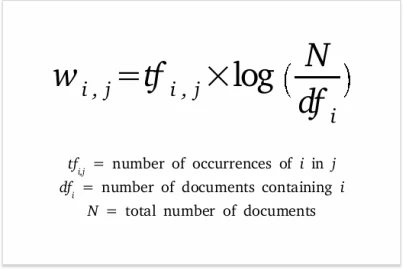

Tfidf on airbnb data...

In [ ]:
df['title']

0       Twin beds with living room! 8min walk from GINZA!
1       6 min Sta. Very near Akihabara!!Good location/503
2                               大山駅から3分、高速無制限WiFi、池袋駅まで5分
3            New Double Room in Tokyo: Skytree View 702 B
4           Fashionable apartment close TOKYO SKYTREE 3-1
                              ...                        
2835     2mins->Keisei Nippori Station/Mixed Capsule Room
2836    【ROOM 402】 SKYTREE VIEW! 1LDK! MAX 4PPL FREE W...
2837    Rumah Bagus Asakusa★15p /Whole rent＆WiFi sky tree
2838    Quiet residential Shinjuku area,8 min on foot Sta
2839       4 minutes to Shinjuku: New Tokyo Apartment 302
Name: title, Length: 2840, dtype: object

In [ ]:
sample = df['title']

vec = TfidfVectorizer()

X = vec.fit_transform(sample)

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,02,031,10,100inchプロジェクターシアタールームdvdnetflixamazonprime設置,100インチプロジェクター,101,101_bureau渋谷,102,103,103welcome,105,10min,10mins,10月一時休業,11,111,12,120インチプロジェクター,13min,13mins,15,15p,1bd,1br,1c,1db,1dk,1f,1h,1k,1ldk,1min,1mins,1p,1ppl,1room,1stop,1t,1名,20,...,送迎有,通信制限なし高速インターネット付,通信制限なし高速インターネット付で,都内へのアクセスよし,鎌倉,長期滞在に便利な施設です,長期滞在も歓迎です,長期滞在可能,閑静な住宅街,閑静の住宅街の中のゲストハウス,阿美橫町,除菌消毒徹底,雙人房101,雷門,静かな住宅街の中で,非接触型チェックイン,飲食店多数あり,駅から1分,駅から徒歩3分,駅から歩いて1分,駅から近い,駅まで徒歩で7分,駅徒歩３分,駅近立地,高速,高速wi,高速無制限wifi,龍馬池袋,１階,１２,６ベッド用意,ｂａｒ,ｃａｆé,ｺﾝﾋﾞﾆ,ｽｶｲﾂﾘｰまで徒歩3分,𝑁𝐸𝑊,𝑂𝑃𝐸𝑁4,𝑎𝑟𝑒𝑎,𝑎𝑠𝑎𝑘𝑢𝑠𝑎,𝑠𝑘𝑦𝑡𝑟𝑒𝑒
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.384425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.379169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Derived Features

In [ ]:
df

,ds,search_filter,url,title,type,location,guests,bedrooms,beds,is_studio,baths,half_baths,shared_baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,heating_bool,waterfront_bool,dishwasher_bool,beachfront_bool,ski_in_ski_out_bool,terrace_bool,sonos_sound_system_bool,bbq_grill_bool,hair_dryer_bool
0,2021-01-19 06:11:41.572636,NaN,http://airbnb.com/rooms/47707528,Twin beds with living room! 8min walk from GINZA!,Entire apartment,Chuo City,3.0,1,3.0,False,1.5,NaN,NaN,112.0,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,2021-01-19 06:11:41.572636,NaN,http://airbnb.com/rooms/34843394,6 min Sta. Very near Akihabara!!Good location/503,Entire apartment,Bunkyo City,NaN,1,NaN,False,1.0,NaN,NaN,23.0,4.57,56.0,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,2021-01-19 06:11:41.572636,NaN,http://airbnb.com/rooms/47481465,大山駅から3分、高速無制限WiFi、池袋駅まで5分,Entire apartment,Itabashi City,2.0,1,2.0,False,1.0,NaN,NaN,33.0,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,2021-01-19 06:11:41.572636,NaN,http://airbnb.com/rooms/12611991,New Double Room in Tokyo: Skytree View 702 B,Entire apartment,Sumida-ku,NaN,1,NaN,False,1.0,NaN,NaN,37.0,4.90,148.0,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,2021-01-19 06:11:41.572636,NaN,http://airbnb.com/rooms/30892718,Fashionable apartment close TOKYO SKYTREE 3-1,Entire apartment,Kōtō-ku,2.0,0,2.0,True,1.0,NaN,NaN,37.0,4.56,99.0,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,2021-01-19 06:19:24.381501,shared_room_super_hosts,http://airbnb.com/rooms/41010866,2mins->Keisei Nippori Station/Mixed Capsule Room,Hotel beds,Arakawa City,NaN,1,NaN,False,NaN,NaN,NaN,14.0,5.00,3.0,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2836,2021-01-19 06:19:24.381501,shared_room_super_hosts,http://airbnb.com/rooms/39231922,【ROOM 402】 SKYTREE VIEW! 1LDK! MAX 4PPL FREE W...,Entire apartment,Koto City,2.0,1,2.0,False,1.0,NaN,NaN,21.0,4.26,19.0,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2837,2021-01-19 06:19:24.381501,shared_room_super_hosts,http://airbnb.com/rooms/33690815,Rumah Bagus Asakusa★15p /Whole rent＆WiFi sky tree,Private room,Sumida City,5.0,1,5.0,False,NaN,NaN,NaN,14.0,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2838,2021-01-19 06:19:24.381501,shared_room_super_hosts,http://airbnb.com/rooms/39589504,"Quiet residential Shinjuku area,8 min on foot Sta",Entire apartment,Shinjuku City,2.0,0,2.0,True,1.0,NaN,NaN,27.0,4.71,35.0,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
t = pd.DataFrame()

t['price_per_bed'] = df['beds'] / df['price']

t

,price_per_bed
0,0.026786
1,NaN
2,0.060606
3,NaN
4,0.054054
...,...
2835,NaN
2836,0.095238
2837,0.357143
2838,0.074074


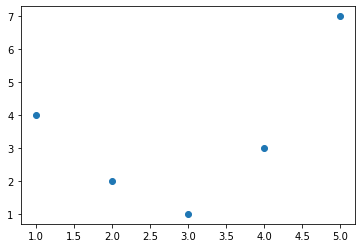

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

In [ ]:
X = x[:, np.newaxis]
X.shape

(5, 1)

In [ ]:
x.shape

(5,)

In [ ]:
y

array([4, 2, 1, 3, 7])

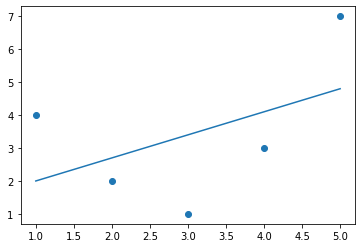

In [ ]:
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]

# y = mx + b
model = LinearRegression().fit(X, y)
yfit = model.predict(X)

plt.scatter(x, y)
plt.plot(x, yfit);

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [ ]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

X2 = poly.fit_transform(X)

print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X2 = poly.fit_transform(np.array([1, 2]).reshape(-1, 1))

print(X2)

[[1. 1.]
 [2. 4.]]


In [ ]:
X2 = poly.fit_transform(np.array([[1, 2], [1, 3]]))
X2


array([[1., 2., 1., 2., 4.],
       [1., 3., 1., 3., 9.]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)

print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


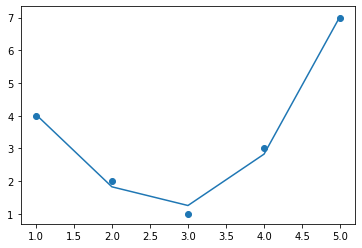

In [ ]:
model = LinearRegression().fit(X2, y)

yfit = model.predict(X2)

plt.scatter(x, y)
plt.plot(x, yfit);

### Missing Data

In [ ]:
import numpy as np 

X = np.array([[np.nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   np.nan, 6  ],
              [ 8,   8,   1  ]])

y = np.array([14, 16, -1,  8, -5])

In [ ]:
pd.DataFrame(X)

,0,1,2
0,NaN,0.0,3.0
1,3.0,7.0,9.0
2,3.0,5.0,2.0
3,4.0,NaN,6.0
4,8.0,8.0,1.0


In [ ]:
pd.DataFrame(X).fillna(0)

,0,1,2
0,0.0,0.0,3.0
1,3.0,7.0,9.0
2,3.0,5.0,2.0
3,4.0,0.0,6.0
4,8.0,8.0,1.0


In [ ]:
pd.DataFrame(X).fillna('a string')

,0,1,2
0,a string,0,3.0
1,3,7,9.0
2,3,5,2.0
3,4,a string,6.0
4,8,8,1.0


- https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
- https://scikit-learn.org/stable/modules/impute.html

In [ ]:
X

array([[nan,  0.,  3.],
       [ 3.,  7.,  9.],
       [ 3.,  5.,  2.],
       [ 4., nan,  6.],
       [ 8.,  8.,  1.]])

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

X2 = imp.fit_transform(X)

X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [ ]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

If that simple... could also just use pandas..

In [ ]:
t = pd.DataFrame(X)

t.fillna(t.mean())

,0,1,2
0,4.5,0.0,3.0
1,3.0,7.0,9.0
2,3.0,5.0,2.0
3,4.0,5.0,6.0
4,8.0,8.0,1.0


# Random Test

In [ ]:
import pandas as pd

tokyo = 'https://gist.githubusercontent.com/gumdropsteve/40555dbb4cb01e694328879175e5feaf/raw/59a74ffbb4000a37f1bdb2f61dc7e702e07fa6e7/tokyo.csv'

df = pd.read_csv(tokyo)

df.tail(3)

,ds,search_filter,url,title,type,location,guests,bedrooms,beds,is_studio,baths,half_baths,shared_baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,heating_bool,waterfront_bool,dishwasher_bool,beachfront_bool,ski_in_ski_out_bool,terrace_bool,sonos_sound_system_bool,bbq_grill_bool,hair_dryer_bool
2837,2021-01-19 06:19:24.381501,shared_room_super_hosts,http://airbnb.com/rooms/33690815,Rumah Bagus Asakusa★15p /Whole rent＆WiFi sky tree,Private room,Sumida City,5.0,1,5.0,False,NaN,NaN,NaN,14.0,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2838,2021-01-19 06:19:24.381501,shared_room_super_hosts,http://airbnb.com/rooms/39589504,"Quiet residential Shinjuku area,8 min on foot Sta",Entire apartment,Shinjuku City,2.0,0,2.0,True,1.0,NaN,NaN,27.0,4.71,35.0,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2839,2021-01-19 06:19:24.381501,shared_room_super_hosts,http://airbnb.com/rooms/30092062,4 minutes to Shinjuku: New Tokyo Apartment 302,Entire apartment,Nakano-ku,NaN,0,NaN,True,1.0,NaN,NaN,32.0,4.86,69.0,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)

# get list of dicts from `type` column
data = [{'type':v} for v in df.type]

d = vec.fit_transform(data)

type_df = pd.DataFrame(d, columns=vec.feature_names_)
type_df.tail(3)

,type=Beds,type=Entire apartment,type=Entire cabin,type=Entire condominium,type=Entire house,type=Entire loft,type=Entire serviced apartment,type=Entire townhouse,type=Hostel beds,type=Hostel room,type=Hotel beds,type=Hotel room,type=Private room,type=Room,type=Shared room
2837,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2838,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2839,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
sample = df['title']

vec = TfidfVectorizer()

X = vec.fit_transform(sample)

tfidf_df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
tfidf_df.tail(3)

,02,031,10,100inchプロジェクターシアタールームdvdnetflixamazonprime設置,100インチプロジェクター,101,101_bureau渋谷,102,103,103welcome,105,10min,10mins,10月一時休業,11,111,12,120インチプロジェクター,13min,13mins,15,15p,1bd,1br,1c,1db,1dk,1f,1h,1k,1ldk,1min,1mins,1p,1ppl,1room,1stop,1t,1名,20,...,送迎有,通信制限なし高速インターネット付,通信制限なし高速インターネット付で,都内へのアクセスよし,鎌倉,長期滞在に便利な施設です,長期滞在も歓迎です,長期滞在可能,閑静な住宅街,閑静の住宅街の中のゲストハウス,阿美橫町,除菌消毒徹底,雙人房101,雷門,静かな住宅街の中で,非接触型チェックイン,飲食店多数あり,駅から1分,駅から徒歩3分,駅から歩いて1分,駅から近い,駅まで徒歩で7分,駅徒歩３分,駅近立地,高速,高速wi,高速無制限wifi,龍馬池袋,１階,１２,６ベッド用意,ｂａｒ,ｃａｆé,ｺﾝﾋﾞﾆ,ｽｶｲﾂﾘｰまで徒歩3分,𝑁𝐸𝑊,𝑂𝑃𝐸𝑁4,𝑎𝑟𝑒𝑎,𝑎𝑠𝑎𝑘𝑢𝑠𝑎,𝑠𝑘𝑦𝑡𝑟𝑒𝑒
2837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.379169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
big_df = pd.concat([df, type_df, tfidf_df], axis=1)

big_df

,ds,search_filter,url,title,type,location,guests,bedrooms,beds,is_studio,baths,half_baths,shared_baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,heating_bool,waterfront_bool,dishwasher_bool,beachfront_bool,ski_in_ski_out_bool,terrace_bool,sonos_sound_system_bool,bbq_grill_bool,hair_dryer_bool,type=Beds,...,送迎有,通信制限なし高速インターネット付,通信制限なし高速インターネット付で,都内へのアクセスよし,鎌倉,長期滞在に便利な施設です,長期滞在も歓迎です,長期滞在可能,閑静な住宅街,閑静の住宅街の中のゲストハウス,阿美橫町,除菌消毒徹底,雙人房101,雷門,静かな住宅街の中で,非接触型チェックイン,飲食店多数あり,駅から1分,駅から徒歩3分,駅から歩いて1分,駅から近い,駅まで徒歩で7分,駅徒歩３分,駅近立地,高速,高速wi,高速無制限wifi,龍馬池袋,１階,１２,６ベッド用意,ｂａｒ,ｃａｆé,ｺﾝﾋﾞﾆ,ｽｶｲﾂﾘｰまで徒歩3分,𝑁𝐸𝑊,𝑂𝑃𝐸𝑁4,𝑎𝑟𝑒𝑎,𝑎𝑠𝑎𝑘𝑢𝑠𝑎,𝑠𝑘𝑦𝑡𝑟𝑒𝑒
0,2021-01-19 06:11:41.572636,NaN,http://airbnb.com/rooms/47707528,Twin beds with living room! 8min walk from GINZA!,Entire apartment,Chuo City,3.0,1,3.0,False,1.5,NaN,NaN,112.0,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-19 06:11:41.572636,NaN,http://airbnb.com/rooms/34843394,6 min Sta. Very near Akihabara!!Good location/503,Entire apartment,Bunkyo City,NaN,1,NaN,False,1.0,NaN,NaN,23.0,4.57,56.0,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-19 06:11:41.572636,NaN,http://airbnb.com/rooms/47481465,大山駅から3分、高速無制限WiFi、池袋駅まで5分,Entire apartment,Itabashi City,2.0,1,2.0,False,1.0,NaN,NaN,33.0,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-01-19 06:11:41.572636,NaN,http://airbnb.com/rooms/12611991,New Double Room in Tokyo: Skytree View 702 B,Entire apartment,Sumida-ku,NaN,1,NaN,False,1.0,NaN,NaN,37.0,4.90,148.0,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-01-19 06:11:41.572636,NaN,http://airbnb.com/rooms/30892718,Fashionable apartment close TOKYO SKYTREE 3-1,Entire apartment,Kōtō-ku,2.0,0,2.0,True,1.0,NaN,NaN,37.0,4.56,99.0,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,2021-01-19 06:19:24.381501,shared_room_super_hosts,http://airbnb.com/rooms/41010866,2mins->Keisei Nippori Station/Mixed Capsule Room,Hotel beds,Arakawa City,NaN,1,NaN,False,NaN,NaN,NaN,14.0,5.00,3.0,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2836,2021-01-19 06:19:24.381501,shared_room_super_hosts,http://airbnb.com/rooms/39231922,【ROOM 402】 SKYTREE VIEW! 1LDK! MAX 4PPL FREE W...,Entire apartment,Koto City,2.0,1,2.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop(['price', 'ds'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

ValueError: ignored